In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
import pandas as pd
Infarction = pd.read_csv("Myocardial_Infarction_Data.csv")
Infarction.head()

,ID,ID.1,ID.2,ID.3,ID.4,ID.5,ID.6,ID.7,ID.8,ID.9,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125
0,1.0,77.0,1.0,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,2.0,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,3.0,52.0,1.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,4.0,68.0,0.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
4,5.0,60.0,1.0,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [3]:
Infarction.isna().sum()

ID             0
ID.1         461
ID.2           0
ID.3         231
ID.4        6494
           ...  
ID.121         0
ID.122         0
ID.123         0
ID.124    102000
ID.125    102000
Length: 126, dtype: int64

In [4]:
Infarction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Columns: 126 entries, ID to ID.125
dtypes: float64(126)
memory usage: 98.1 MB


In [5]:
Infarction[Infarction.duplicated()]

,ID,ID.1,ID.2,ID.3,ID.4,ID.5,ID.6,ID.7,ID.8,ID.9,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125


In [6]:
Infarction.describe()

,ID,ID.1,ID.2,ID.3,ID.4,ID.5,ID.6,ID.7,ID.8,ID.9,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125
count,102000.000000,101539.000000,102000.000000,101769.000000,95506.000000,97573.000000,98903.000000,4304.000000,101476.000000,101538.000000,...,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,102000.000000,0.0,0.0
mean,851.875307,61.862025,0.623273,0.557202,2.316390,1.205661,1.164760,0.374710,1.399204,0.033826,...,0.033566,0.095356,0.031084,0.044008,0.235759,0.094332,0.087375,0.476065,NaN,NaN
std,490.997815,11.221339,0.494456,0.843194,2.443226,1.045210,0.807007,0.495004,1.092665,0.206763,...,0.205670,0.309788,0.201143,0.227006,0.435946,0.308996,0.299977,1.379181,NaN,NaN
min,0.710000,25.820000,-0.420000,-0.400000,-0.410000,-0.360000,-0.390000,-0.350000,-0.420000,-0.410000,...,-0.450000,-0.450000,-0.570000,-0.450000,-0.420000,-0.420000,-0.410000,-0.420000,NaN,NaN
25%,426.060000,54.140000,0.040000,-0.020000,0.020000,0.030000,0.240000,-0.020000,0.050000,-0.060000,...,-0.060000,-0.060000,-0.060000,-0.060000,-0.040000,-0.060000,-0.060000,-0.050000,NaN,NaN
50%,852.000000,62.900000,0.920000,0.080000,1.140000,1.890000,1.070000,0.080000,1.940000,-0.000000,...,0.000000,0.010000,0.000000,0.000000,0.040000,0.010000,0.010000,0.020000,NaN,NaN
75%,1279.792500,69.930000,1.020000,1.000000,5.000000,2.020000,1.980000,0.960000,2.060000,0.070000,...,0.070000,0.090000,0.070000,0.080000,0.210000,0.090000,0.090000,0.120000,NaN,NaN
max,1700.230000,92.190000,1.460000,3.370000,6.380000,4.310000,2.410000,1.330000,3.400000,1.350000,...,1.330000,1.350000,1.360000,1.390000,1.380000,1.380000,1.330000,7.330000,NaN,NaN


In [7]:
print(type(Infarction))
print(Infarction.shape)
print(Infarction.size)

<class 'pandas.core.frame.DataFrame'>
(102000, 126)
12852000


In [8]:
Infarction[Infarction.duplicated(keep = False)]

,ID,ID.1,ID.2,ID.3,ID.4,ID.5,ID.6,ID.7,ID.8,ID.9,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125


In [9]:
Infarction.drop_duplicates(keep='first', inplace = True)
Infarction

,ID,ID.1,ID.2,ID.3,ID.4,ID.5,ID.6,ID.7,ID.8,ID.9,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125
0,1.00,77.00,1.00,2.00,1.00,1.00,2.00,NaN,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,2.00,55.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
2,3.00,52.00,1.00,0.00,0.00,0.00,2.00,NaN,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,4.00,68.00,0.00,0.00,0.00,0.00,2.00,NaN,2.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN,NaN
4,5.00,60.00,1.00,0.00,0.00,0.00,2.00,NaN,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,1418.14,80.02,-0.06,3.09,1.92,2.97,1.13,NaN,1.96,0.02,...,-0.16,0.99,-0.07,0.03,-0.16,0.12,0.13,0.02,NaN,NaN
101996,567.07,74.08,0.02,-0.10,6.11,2.04,1.15,NaN,1.99,-0.06,...,0.20,-0.16,-0.11,0.22,0.98,-0.00,-0.00,0.12,NaN,NaN
101997,1106.91,62.12,-0.08,-0.02,NaN,2.03,0.99,NaN,-0.19,0.04,...,-0.02,-0.17,0.09,0.00,0.07,-0.03,1.14,-0.01,NaN,NaN
101998,271.06,65.89,1.02,0.18,-0.12,0.04,2.04,NaN,-0.01,-0.00,...,-0.01,0.07,0.21,0.01,-0.03,-0.02,-0.17,0.10,NaN,NaN


<Axes: >

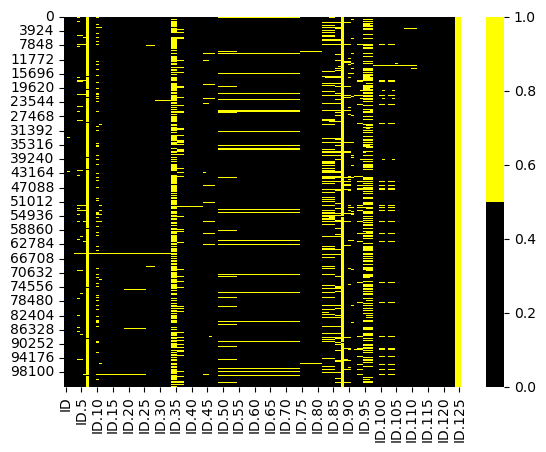

In [10]:
cols = Infarction.columns
colors = ['black', 'yellow']
sns.heatmap(Infarction[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [11]:
Infarction.reset_index(drop=True)

,ID,ID.1,ID.2,ID.3,ID.4,ID.5,ID.6,ID.7,ID.8,ID.9,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125
0,1.00,77.00,1.00,2.00,1.00,1.00,2.00,NaN,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,2.00,55.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
2,3.00,52.00,1.00,0.00,0.00,0.00,2.00,NaN,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,4.00,68.00,0.00,0.00,0.00,0.00,2.00,NaN,2.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN,NaN
4,5.00,60.00,1.00,0.00,0.00,0.00,2.00,NaN,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,1418.14,80.02,-0.06,3.09,1.92,2.97,1.13,NaN,1.96,0.02,...,-0.16,0.99,-0.07,0.03,-0.16,0.12,0.13,0.02,NaN,NaN
101996,567.07,74.08,0.02,-0.10,6.11,2.04,1.15,NaN,1.99,-0.06,...,0.20,-0.16,-0.11,0.22,0.98,-0.00,-0.00,0.12,NaN,NaN
101997,1106.91,62.12,-0.08,-0.02,NaN,2.03,0.99,NaN,-0.19,0.04,...,-0.02,-0.17,0.09,0.00,0.07,-0.03,1.14,-0.01,NaN,NaN
101998,271.06,65.89,1.02,0.18,-0.12,0.04,2.04,NaN,-0.01,-0.00,...,-0.01,0.07,0.21,0.01,-0.03,-0.02,-0.17,0.10,NaN,NaN


In [12]:
median_ID = Infarction["ID"].median()
mean_ID = Infarction["ID"].mean()
print("Median of ID: ", median_ID)
print("Mean of ID: ", mean_ID)

Median of ID:  852.0
Mean of ID:  851.8753065686276


In [13]:
median_ID.1 = Infarction["ID.1"].median()
mean_ID.1 = Infarction["ID.1"].mean()
print("Median of ID.1: ", median_ID.1)
print("Mean of ID.1: ", mean_ID.1)

SyntaxError: invalid syntax (2097181003.py, line 1)

In [16]:
Infarction = Infarction.drop(['ID',"ID.5"], axis =1)
Infarction

,ID.1,ID.2,ID.3,ID.4,ID.6,ID.7,ID.8,ID.9,ID.10,ID.11,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125
0,77.00,1.00,2.00,1.00,2.00,NaN,3.00,0.00,7.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,55.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
2,52.00,1.00,0.00,0.00,2.00,NaN,2.00,0.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,68.00,0.00,0.00,0.00,2.00,NaN,2.00,0.00,3.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN,NaN
4,60.00,1.00,0.00,0.00,2.00,NaN,3.00,0.00,7.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,80.02,-0.06,3.09,1.92,1.13,NaN,1.96,0.02,6.99,2.97,...,-0.16,0.99,-0.07,0.03,-0.16,0.12,0.13,0.02,NaN,NaN
101996,74.08,0.02,-0.10,6.11,1.15,NaN,1.99,-0.06,NaN,2.02,...,0.20,-0.16,-0.11,0.22,0.98,-0.00,-0.00,0.12,NaN,NaN
101997,62.12,-0.08,-0.02,NaN,0.99,NaN,-0.19,0.04,-0.01,-0.05,...,-0.02,-0.17,0.09,0.00,0.07,-0.03,1.14,-0.01,NaN,NaN
101998,65.89,1.02,0.18,-0.12,2.04,NaN,-0.01,-0.00,-0.05,0.09,...,-0.01,0.07,0.21,0.01,-0.03,-0.02,-0.17,0.10,NaN,NaN


In [18]:
Infarction['ID.4']=pd.to_numeric(Infarction['ID.4'],errors='coerce')
Infarction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Columns: 124 entries, ID.1 to ID.125
dtypes: float64(124)
memory usage: 96.5 MB


In [20]:
Infarction.rename({'ID.2': 'ID-2'}, axis=1, inplace = True)
Infarction

,ID.1,ID-2,ID.3,ID.4,ID.6,ID.7,ID.8,ID.9,ID.10,ID.11,...,ID.116,ID.117,ID.118,ID.119,ID.120,ID.121,ID.122,ID.123,ID.124,ID.125
0,77.00,1.00,2.00,1.00,2.00,NaN,3.00,0.00,7.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
1,55.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
2,52.00,1.00,0.00,0.00,2.00,NaN,2.00,0.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
3,68.00,0.00,0.00,0.00,2.00,NaN,2.00,0.00,3.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN,NaN
4,60.00,1.00,0.00,0.00,2.00,NaN,3.00,0.00,7.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,80.02,-0.06,3.09,1.92,1.13,NaN,1.96,0.02,6.99,2.97,...,-0.16,0.99,-0.07,0.03,-0.16,0.12,0.13,0.02,NaN,NaN
101996,74.08,0.02,-0.10,6.11,1.15,NaN,1.99,-0.06,NaN,2.02,...,0.20,-0.16,-0.11,0.22,0.98,-0.00,-0.00,0.12,NaN,NaN
101997,62.12,-0.08,-0.02,NaN,0.99,NaN,-0.19,0.04,-0.01,-0.05,...,-0.02,-0.17,0.09,0.00,0.07,-0.03,1.14,-0.01,NaN,NaN
101998,65.89,1.02,0.18,-0.12,2.04,NaN,-0.01,-0.00,-0.05,0.09,...,-0.01,0.07,0.21,0.01,-0.03,-0.02,-0.17,0.10,NaN,NaN
